In [1]:
# Import Modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate
from sklearn.preprocessing import normalize, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score,classification_report,  confusion_matrix, mean_squared_error, mean_absolute_error
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
import seaborn as sns
import joblib

from tensorflow.keras.models import load_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam,SGD
from keras.initializers import HeNormal, RandomNormal
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import BinaryAccuracy, Precision
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau


In [3]:
### DATA PREPROCESSING

In [2]:
# Read file containing the dataset
df = pd.read_excel(r'C:\Users\shefa\Documents\UNSW\COMP9414_AI\Assignment_1\Generalization Dataset.xlsx')
df

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-11,15:00:00,2.2,1310.00,79,8.826223,932.50,184.0,1081.75,126.0,1646.50,946.25,8.325,79.799999,0.877784
1,2004-03-15,05:00:00,1.0,1074.50,39,3.865914,703.25,88.0,1155.75,74.0,1463.75,1010.00,11.900,67.449999,0.937538
2,2004-03-15,06:00:00,1.4,1156.75,51,6.385320,829.50,138.0,1029.50,80.0,1584.00,1083.00,11.375,70.525000,0.947516
3,2004-03-15,07:00:00,2.2,1314.00,107,9.685047,965.75,228.0,896.75,89.0,1710.25,1234.75,11.325,70.200001,0.940095
4,2004-03-15,08:00:00,5.5,1796.75,336,25.870458,1451.00,360.0,652.00,114.0,2323.00,1679.50,12.400,63.875001,0.916955
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
867,2005-04-04,10:00:00,3.1,1314.25,-200,13.529605,1101.25,471.7,538.50,189.8,1374.25,1728.50,21.850,29.250000,0.756824
868,2005-04-04,11:00:00,2.4,1162.50,-200,11.355157,1027.00,353.3,603.75,179.2,1263.50,1269.00,24.325,23.725000,0.711864
869,2005-04-04,12:00:00,2.4,1142.00,-200,12.374538,1062.50,293.0,603.25,174.7,1240.75,1092.00,26.900,18.350000,0.640649
870,2005-04-04,13:00:00,2.1,1002.50,-200,9.547187,960.50,234.5,701.50,155.7,1041.00,769.75,28.325,13.550000,0.513866


In [3]:
# Display Dataframe Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 15 columns):
Date             872 non-null datetime64[ns]
Time             872 non-null object
CO(GT)           872 non-null float64
PT08.S1(CO)      872 non-null float64
NMHC(GT)         872 non-null int64
C6H6(GT)         872 non-null float64
PT08.S2(NMHC)    872 non-null float64
NOx(GT)          872 non-null float64
PT08.S3(NOx)     872 non-null float64
NO2(GT)          872 non-null float64
PT08.S4(NO2)     872 non-null float64
PT08.S5(O3)      872 non-null float64
T                872 non-null float64
RH               872 non-null float64
AH               872 non-null float64
dtypes: datetime64[ns](1), float64(12), int64(1), object(1)
memory usage: 102.3+ KB


In [4]:
# Display data types of each column
df.dtypes

Date             datetime64[ns]
Time                     object
CO(GT)                  float64
PT08.S1(CO)             float64
NMHC(GT)                  int64
C6H6(GT)                float64
PT08.S2(NMHC)           float64
NOx(GT)                 float64
PT08.S3(NOx)            float64
NO2(GT)                 float64
PT08.S4(NO2)            float64
PT08.S5(O3)             float64
T                       float64
RH                      float64
AH                      float64
dtype: object

In [5]:
# Print shape(rows, columns) of dataframe
df.shape

(872, 15)

In [6]:
# Replace -200 (representing Null) values with NaN
df.replace(-200, np.nan, inplace=True)

In [7]:
# Calculate the mean of 'CO(GT)' column excluding missing values (Nulls)
co_gt_mean = df['CO(GT)'].mean(skipna=True)
co_gt_mean

2.2393348623853258

In [8]:
# Variation range (min, max) for all variables.
df.agg(['min', 'max'])

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
min,2004-03-11,00:00:00,0.1,762.00,11.0,0.747676,472.25,2.0,329.75,5.0,741.5,326.0,0.325000,9.875,0.247748
max,2005-04-04,23:00:00,9.4,2039.75,685.0,43.943154,1851.00,1247.0,2095.25,310.1,2679.0,2358.5,40.900001,88.725,2.066996


In [9]:
# Describe Statistical data of Dataframe
df.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,872.000000,872.000000,73.000000,872.000000,872.000000,872.000000,872.000000,872.000000,872.000000,872.000000,872.000000,872.000000,872.000000
mean,2.239335,1153.710914,223.328767,10.457802,955.237768,258.802982,822.261659,116.122936,1452.654625,1057.488532,18.058238,49.786239,0.993308
std,1.476895,234.659592,165.215941,7.463243,262.733634,205.511044,256.967137,42.507509,345.833688,387.484349,7.434798,18.535890,0.344493
min,0.100000,762.000000,11.000000,0.747676,472.250000,2.000000,329.750000,5.000000,741.500000,326.000000,0.325000,9.875000,0.247748
25%,1.200000,969.687500,84.000000,4.805543,753.562500,116.275000,648.687500,86.400000,1237.125000,757.250000,13.050000,34.143749,0.809264
50%,1.900000,1101.000000,200.000000,8.826223,932.500000,191.450000,805.000000,113.100000,1451.250000,1012.250000,16.475000,50.500000,0.991547
75%,2.900000,1302.562500,319.000000,14.299955,1126.312500,334.950000,958.875000,143.000000,1673.812500,1323.250000,22.743750,63.649999,1.135708
max,9.400000,2039.750000,685.000000,43.943154,1851.000000,1247.000000,2095.250000,310.100000,2679.000000,2358.500000,40.900001,88.725000,2.066996


In [10]:
# Display top 5 rows 
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-11,15:00:00,2.2,1310.00,79.0,8.826223,932.50,184.0,1081.75,126.0,1646.50,946.25,8.325,79.799999,0.877784
1,2004-03-15,05:00:00,1.0,1074.50,39.0,3.865914,703.25,88.0,1155.75,74.0,1463.75,1010.00,11.900,67.449999,0.937538
2,2004-03-15,06:00:00,1.4,1156.75,51.0,6.385320,829.50,138.0,1029.50,80.0,1584.00,1083.00,11.375,70.525000,0.947516
3,2004-03-15,07:00:00,2.2,1314.00,107.0,9.685047,965.75,228.0,896.75,89.0,1710.25,1234.75,11.325,70.200001,0.940095
4,2004-03-15,08:00:00,5.5,1796.75,336.0,25.870458,1451.00,360.0,652.00,114.0,2323.00,1679.50,12.400,63.875001,0.916955


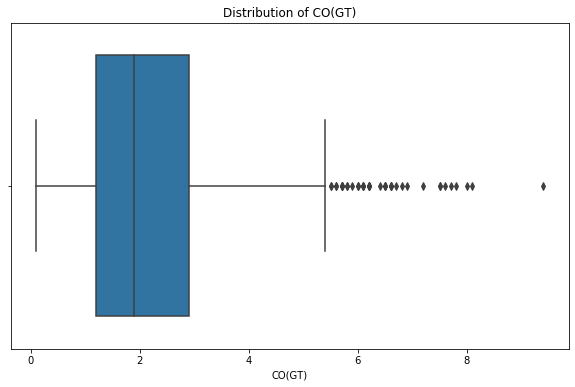

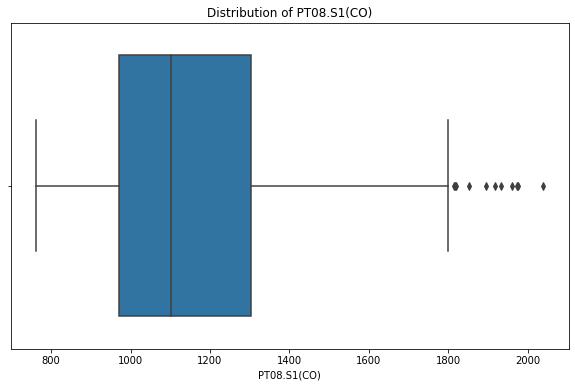

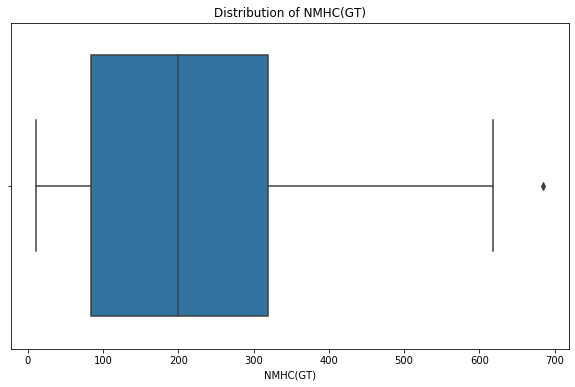

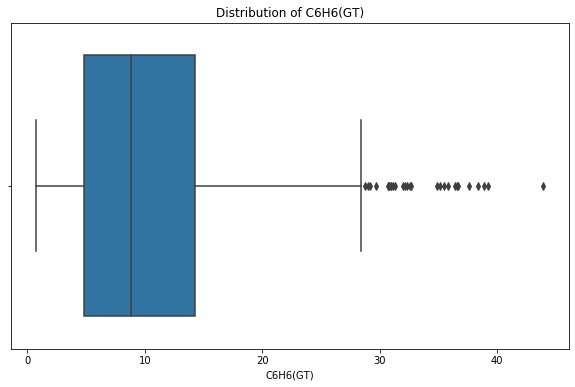

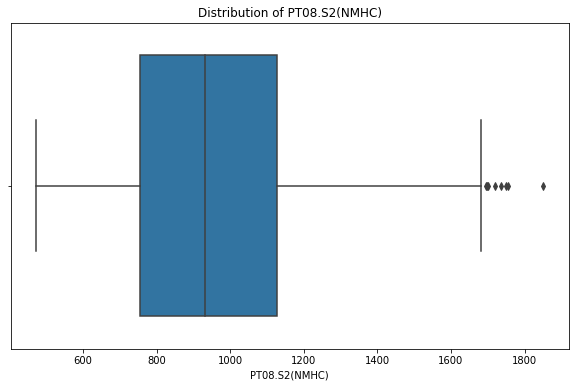

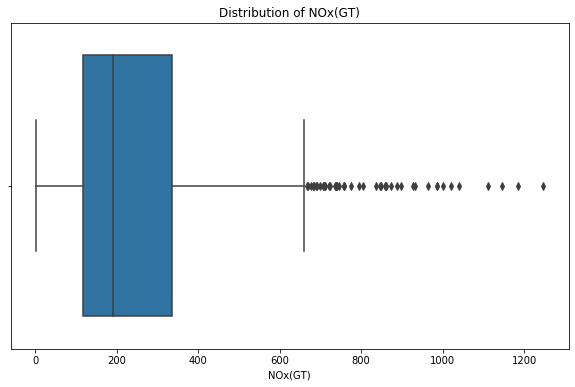

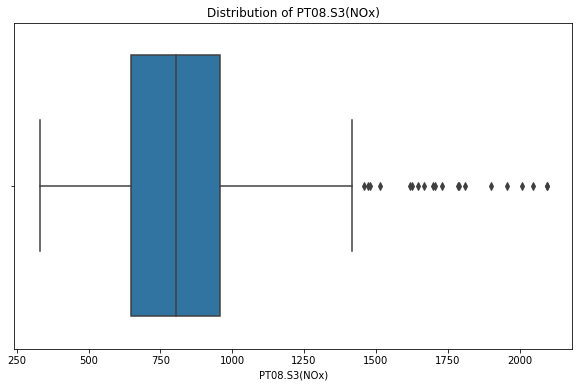

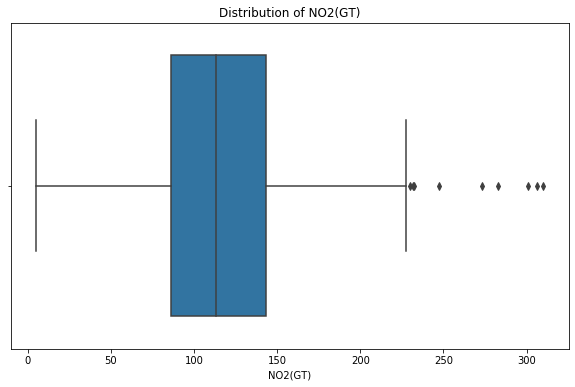

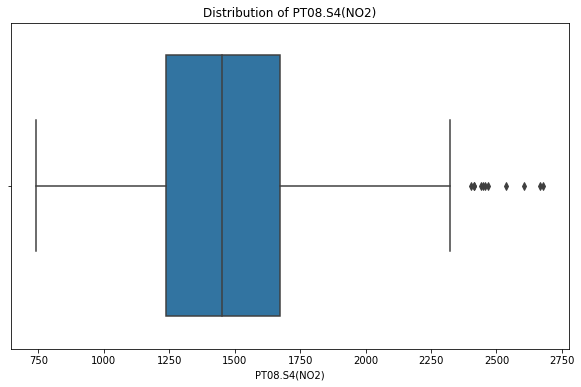

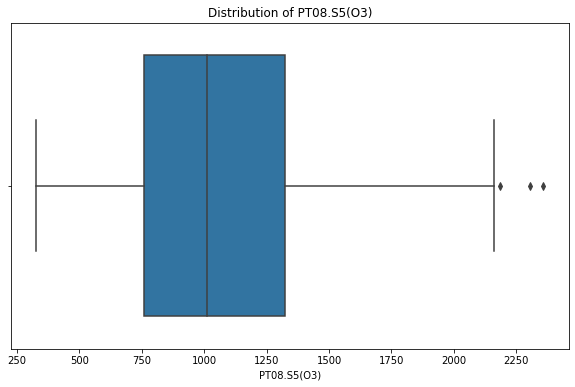

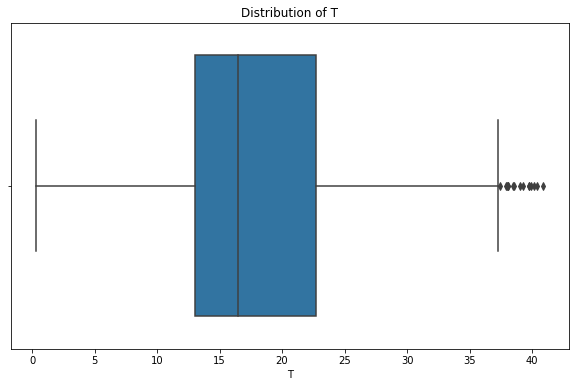

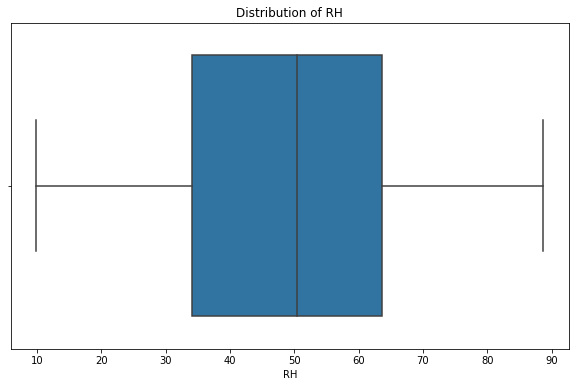

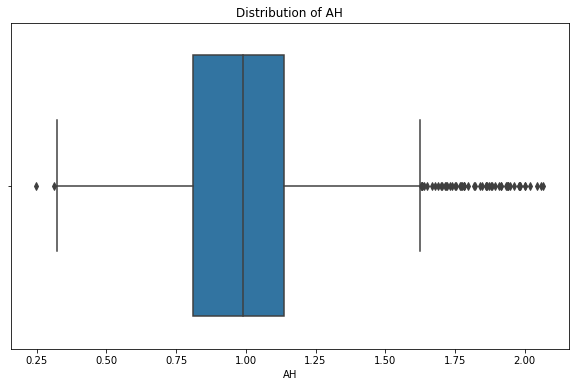

In [11]:
# Using box plots to view the behavioru of Data and Outliers for all Variables
for column in df.columns:    
    if df[column].dtype in [np.float64, np.int64]:
        plt.figure(figsize=(10, 6))
        sns.boxplot(data=df,x=column)
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.show()

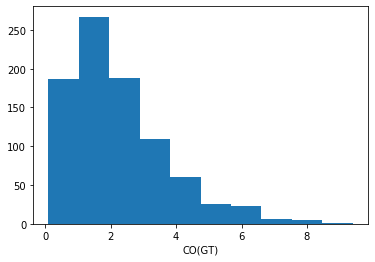

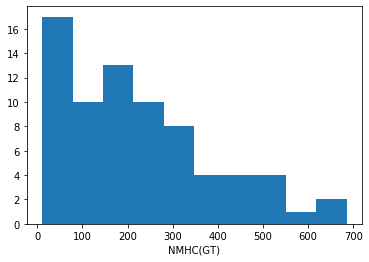

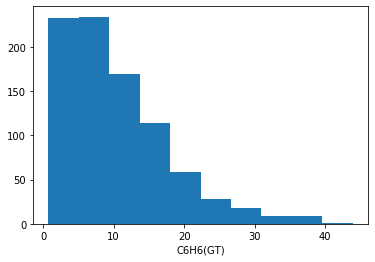

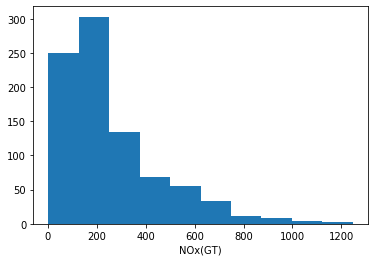

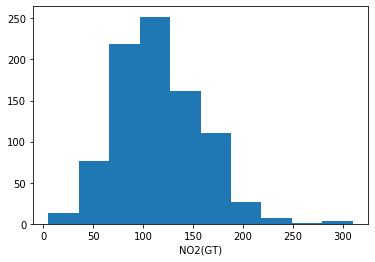

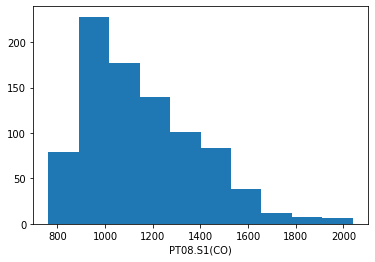

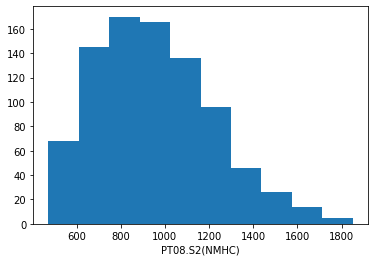

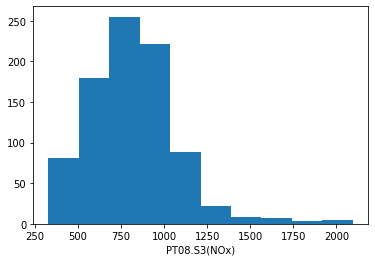

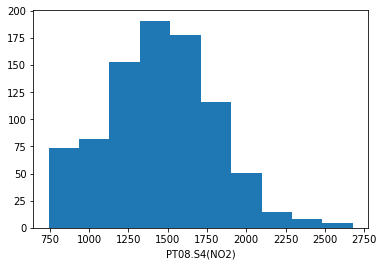

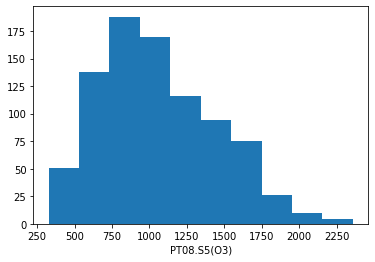

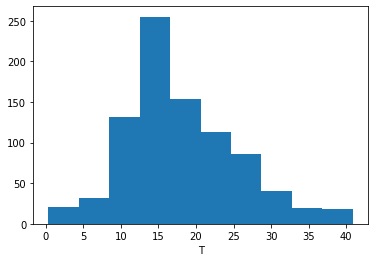

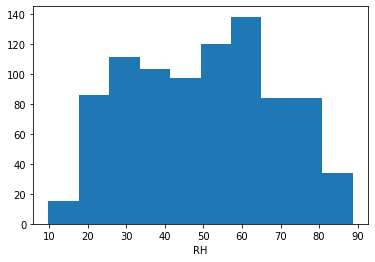

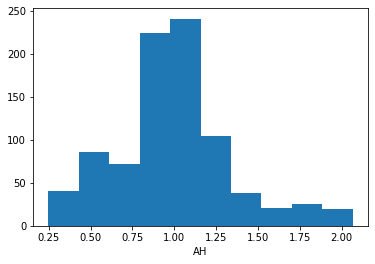

In [12]:
# Using Histograms to view the overall distribution of Variables
for col in ['CO(GT)','NMHC(GT)','C6H6(GT)','NOx(GT)','NO2(GT)','PT08.S1(CO)', 'PT08.S2(NMHC)', 'PT08.S3(NOx)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH']:
    plt.figure(figsize=(6, 4))
    plt.hist(df[col])
    plt.xlabel(col)
    plt.show() 

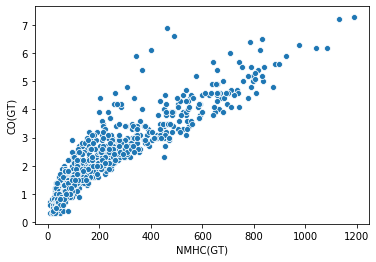

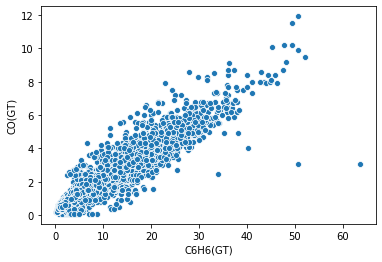

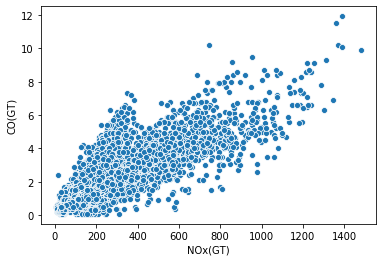

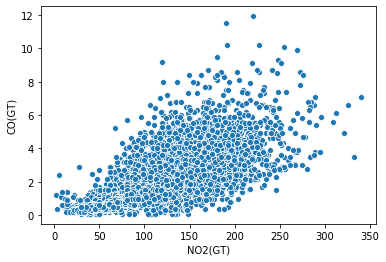

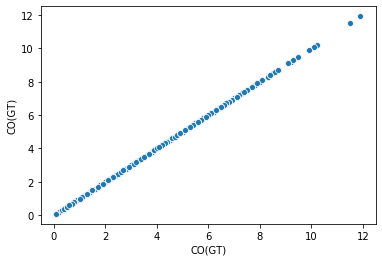

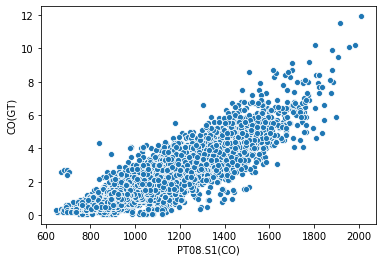

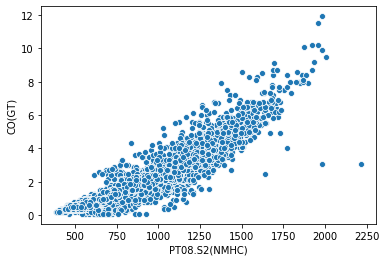

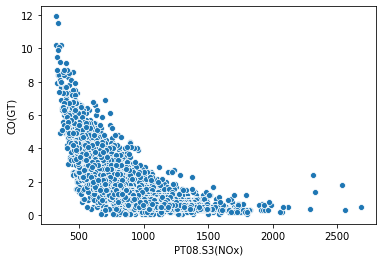

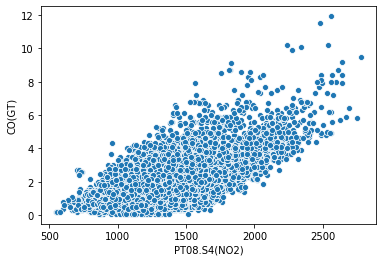

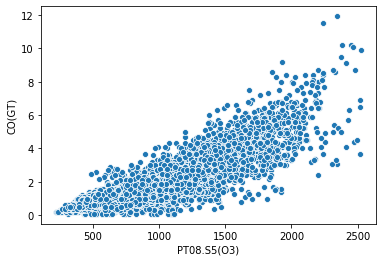

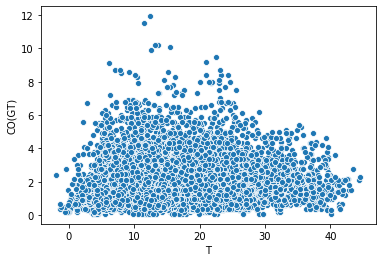

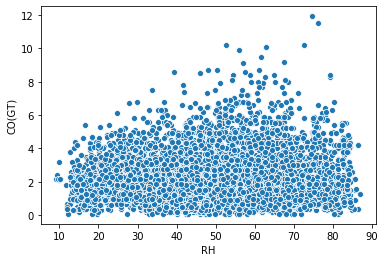

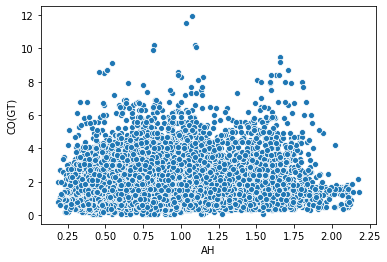

In [15]:
# Using Scatter Plot to show the relationship of 'CO(GT)' with other variables
for col in ['NMHC(GT)','C6H6(GT)','NOx(GT)','NO2(GT)','CO(GT)','PT08.S1(CO)', 'PT08.S2(NMHC)', 'PT08.S3(NOx)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH']:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=df,x=col,y="CO(GT)")
    plt.show() 

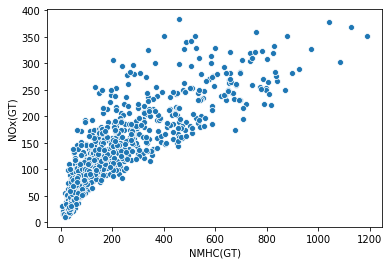

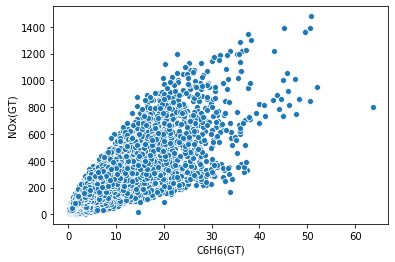

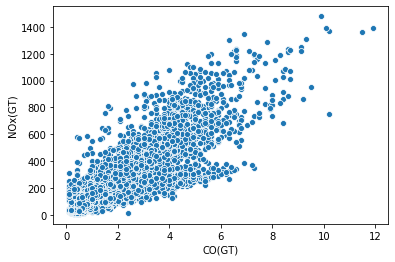

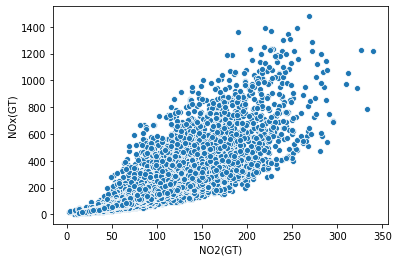

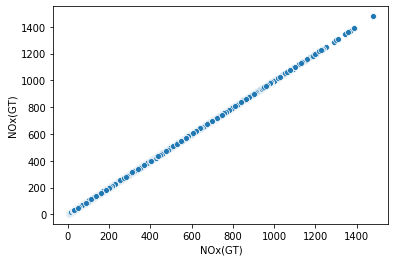

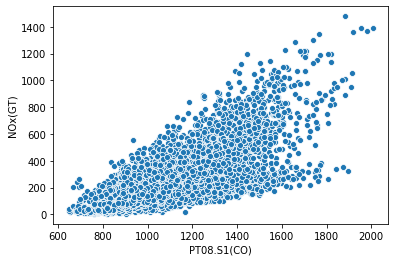

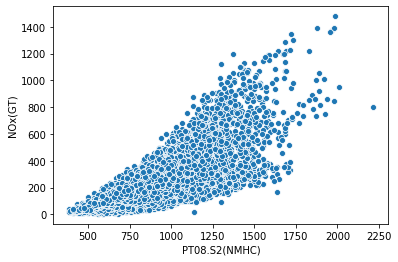

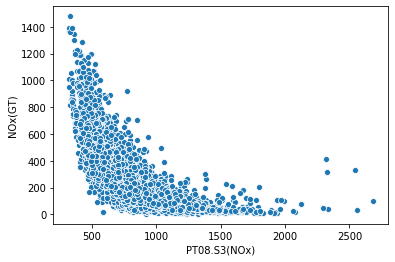

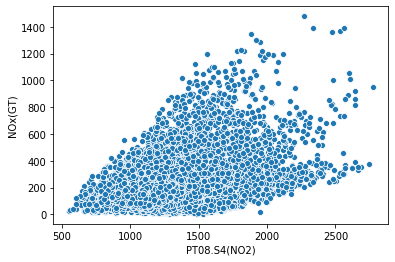

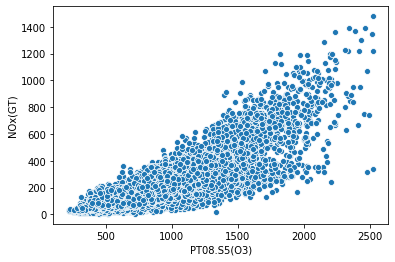

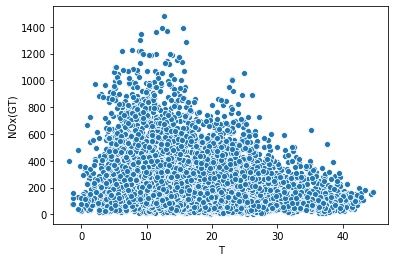

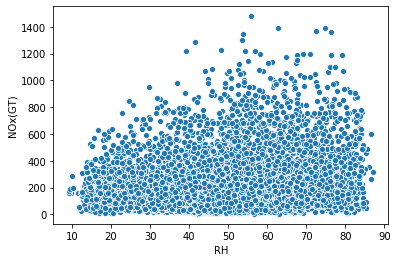

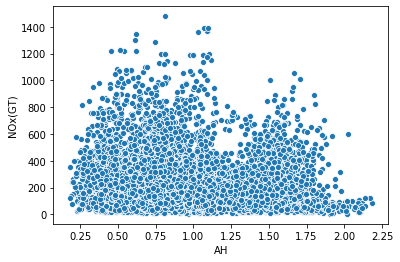

In [16]:
# Using Scatter Plot to show the relationship of "NOx(GT)" with other variables
for col in ['NMHC(GT)','C6H6(GT)','CO(GT)','NO2(GT)','NOx(GT)','PT08.S1(CO)', 'PT08.S2(NMHC)', 'PT08.S3(NOx)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH']:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=df,x=col,y="NOx(GT)")
    plt.show() 

In [13]:
# Check if any columns have Null values
df.isnull().any()

Date             False
Time             False
CO(GT)           False
PT08.S1(CO)      False
NMHC(GT)          True
C6H6(GT)         False
PT08.S2(NMHC)    False
NOx(GT)          False
PT08.S3(NOx)     False
NO2(GT)          False
PT08.S4(NO2)     False
PT08.S5(O3)      False
T                False
RH               False
AH               False
dtype: bool

In [14]:
# Check Total number of Null values for each column 
df.isnull().sum()

Date               0
Time               0
CO(GT)             0
PT08.S1(CO)        0
NMHC(GT)         799
C6H6(GT)           0
PT08.S2(NMHC)      0
NOx(GT)            0
PT08.S3(NOx)       0
NO2(GT)            0
PT08.S4(NO2)       0
PT08.S5(O3)        0
T                  0
RH                 0
AH                 0
dtype: int64

In [15]:
# Compute the Percentage of Null Values for each column
(df.isnull().sum()/df.shape[0])*100

Date              0.00000
Time              0.00000
CO(GT)            0.00000
PT08.S1(CO)       0.00000
NMHC(GT)         91.62844
C6H6(GT)          0.00000
PT08.S2(NMHC)     0.00000
NOx(GT)           0.00000
PT08.S3(NOx)      0.00000
NO2(GT)           0.00000
PT08.S4(NO2)      0.00000
PT08.S5(O3)       0.00000
T                 0.00000
RH                0.00000
AH                0.00000
dtype: float64

In [16]:
# Check to see if there are any duplicates in the Dataframe
df.duplicated().sum()

0

In [17]:
# Dropping rows and columns that have all Null Values
df.dropna(how='all',inplace=True)

# Dropping Date and Time object Columns
df.drop(['Date','Time'], axis=1, inplace=True)

# Drop Variable if more than 60% of its records are Nulls
for col in df.columns:
    if (df[col].isnull().sum()/df.shape[0])*100 > 60:
        df.drop(columns=[col], inplace=True)


In [18]:
# Filling Null Values for each variable with its calculated Mean value
for col in df.columns: 
    col_mean = df[col].mean(skipna=True)
    df[col].fillna(col_mean, inplace=True)

In [19]:
# Check if any missing values are still present
df.isnull().sum()

CO(GT)           0
PT08.S1(CO)      0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [20]:
# Create a Binary Classification Target column for CO(GT) using CO(GT) mean as threshold
# Values above the threshold are classified as 1, while those below are 0
df['CO(GT)_binary'] = df['CO(GT)'].apply(lambda x: 1 if x > co_gt_mean else 0)


In [25]:
### CLASSIFICATION TASK

In [21]:
# Select Features(X) and Target(Y) Variables for classification task
X_classification = df[['C6H6(GT)','NO2(GT)','NOx(GT)','PT08.S1(CO)', 'PT08.S2(NMHC)','PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH']]
Y_classification = df['CO(GT)_binary']


In [27]:
# Split data into Training and Testing sets for Classification using 20% for testing and 80% for training 
X_train_classification, X_test_classification, Y_train_classification, Y_test_classification = train_test_split(X_classification, Y_classification, test_size=0.20, random_state=42)

# Print Shape(rows,columns) of Classification Training and Testing data 
print("Training Data Shape:",X_train_classification.shape)
print("Testing Data Shape:",X_test_classification.shape)

Training Data Shape: (6686, 10)
Testing Data Shape: (1672, 10)


In [28]:
# Standardize the Training and Testing data for the Classification Model into a Standard Scale
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_classification = scaler.fit_transform(X_train_classification)
X_test_classification = scaler.transform(X_test_classification)


In [29]:
### DESIGN AND TRAIN NEURAL NETWORK

In [30]:
# Design the structure of neural network by calculating number of neurons in each layer

# Number of Input neurons is number of input columns (variables) 
Ni = X_train_classification.shape[1]

# Number of Output neurons is 1 for binary classification
No=1

# Number of Samples used for training is 80% of dataset
Nsamples = len(df)*80/100

# Calculate Number of Weights using formula: Nw < Nsamples/10
Nw = Nsamples / 10 

# Calculate number of Hidden Neurons using formula: Nw = (Ni + 1) × Nh + (Nh + 1) × No
Nh = (Nw-No) /(1+Ni+No) 

print("Samples (Training) (Ns):",round(Nsamples))
print("Weights (Nw):",round(Nw))
print("Input Neurons (Ni):",Ni)
print("Output Neurons (No):",No)
print("Hidden Neurons (Nh):",round(Nh))

Samples (Training) (Ns): 6686
Weights (Nw): 669
Input Neurons (Ni): 10
Output Neurons (No): 1
Hidden Neurons (Nh): 56


In [31]:
# Use Keras and TensorFlow to create a Sequential (Feed-Forward) neural network aligning with previously computed neurons (Ni, Nh, No)

classification_model = Sequential([ 
    
    Dense(30, input_shape=(X_train_classification.shape[1],), activation='relu'), 
    BatchNormalization(),

    Dense(12, activation = 'relu'),  
    BatchNormalization(),
    
    Dense(8, activation = 'relu'), 
    BatchNormalization(),
    Dropout(0.2),   
    
    #sigmoid activation function is used for binary classification
    Dense(1, activation = 'sigmoid') 
]) 


In [32]:
# Set optimizer, metrics and loss parameters and compile the classification model
opt = Adam(learning_rate=0.001)
classification_model.compile(optimizer=opt,loss='binary_crossentropy', metrics=['accuracy',Precision()])

# Display the summary of each layer of the neural network 
classification_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                330       
_________________________________________________________________
batch_normalization (BatchNo (None, 30)                120       
_________________________________________________________________
dense_1 (Dense)              (None, 12)                372       
_________________________________________________________________
batch_normalization_1 (Batch (None, 12)                48        
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 104       
_________________________________________________________________
batch_normalization_2 (Batch (None, 8)                 32        
_________________________________________________________________
dropout (Dropout)            (None, 8)                 0

In [33]:
# Train the Classification Model using a 20% validation split 
classification_model_fit = classification_model.fit(X_train_classification, Y_train_classification, 
                                                  epochs=100, batch_size=32, 
                                                  validation_split=0.20,verbose=0)

In [34]:
# Saving the Classification model and scaler function
classification_model.save('classification_model.h5')
joblib.dump(scaler, 'classification_scaler.pkl')

['classification_scaler.pkl']

In [22]:
# Load the saved model and scaler function
classification_model = load_model('classification_model.h5')
classification_scaler = joblib.load('classification_scaler.pkl')
X_test_classification = classification_scaler.transform(X_classification)
Y_test_classification = Y_classification

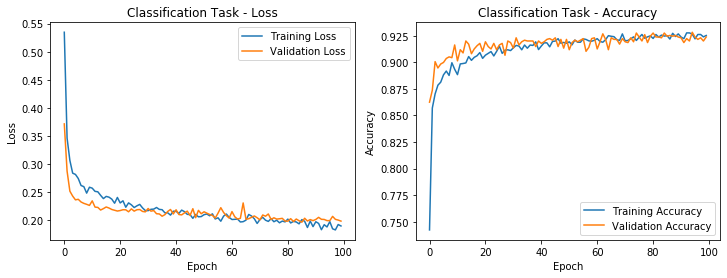

In [36]:
# Plot of training and validation loss over epochs
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(classification_model_fit.history['loss'], label='Training Loss')
plt.plot(classification_model_fit.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Classification Task - Loss')

# Plot of training and validation accuracy over epochs
plt.subplot(1, 2, 2)
plt.plot(classification_model_fit.history['accuracy'], label='Training Accuracy')
plt.plot(classification_model_fit.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Classification Task - Accuracy')
plt.show()


In [37]:
# Calculate Change in Loss
loss_list = classification_model_fit.history['loss']
initial_loss = classification_model_fit.history['loss'][0]
final_loss = classification_model_fit.history['loss'][-1]
loss_improvement_percent = abs((final_loss-initial_loss)*100/initial_loss)

print("Initial Loss:",initial_loss)
print("Final Loss:",final_loss)
print("Overall Change in Loss:",loss_improvement_percent)

Initial Loss: 0.5346441268920898
Final Loss: 0.18952591717243195
Overall Change in Loss: 64.55101484530381


In [23]:
# Evaluate the classification model on the Test Set and compute the Accuracy, Precision, Confusion Matrix
test_loss_classification, test_accuracy_classification, test_precision_classification = classification_model.evaluate(X_test_classification, Y_test_classification,verbose=0)
print("Evaluated Model:")
print(f"Test Loss (Classification): {test_loss_classification:.3f}")
print(f"Test Accuracy (Classification): {test_accuracy_classification*100:.2f}")
print(f"Test Precision (Classification): {test_precision_classification*100:.2f}\n")

Evaluated Model:
Test Loss (Classification): 0.169
Test Accuracy (Classification): 94.38
Test Precision (Classification): 90.58



In [24]:
# Build classification predication model 
predictions_classification = classification_model.predict(X_test_classification) 

# Convert predicion probabilities to class labels(ie. 0,1) for binary classification
y_pred_classification = (predictions_classification > 0.5).astype("int32")

# Compute Accuracy, Precision, Confusion Matrix for Predicted Model against Test set
accuracy = accuracy_score(Y_test_classification, y_pred_classification)
precision = precision_score(Y_test_classification, y_pred_classification)
conf_matrix = confusion_matrix(Y_test_classification, y_pred_classification)
tn,fp,fn,tp = conf_matrix.ravel()

print("Predicted Model:")
print(f'Classification Accuracy: {round(accuracy*100,2)}')
print(f'Classificaion Precision: {round(precision*100,2)}')

print(f'\nConfusion Matrix:\n{conf_matrix}\n')
print('True Positive (TP):',tp) 
print('False Positive (FP):',fp)
print('False Negative (FN):',fn)
print('True Negative (TN):',tn)


Predicted Model:
Classification Accuracy: 94.38
Classificaion Precision: 90.58

Confusion Matrix:
[[496  34]
 [ 15 327]]

True Positive (TP): 327
False Positive (FP): 34
False Negative (FN): 15
True Negative (TN): 496


In [25]:
# Display Confusion Matrix and Accuracy and Precision Tables
from tabulate import tabulate
confusion_matrix_data = [
    ["Confusion Matrix", "Positive (Actual)", "Negative (Actual)"],
    ["Positive (Predicted)", tp, fp],
    ["Negative (Predicted)", fn, tn]
]

accuracy_precision_data = [
    ["", "Accuracy", "Precision", "Number of Samples"],
    ["CO(GT) classification", f"{test_accuracy_classification*100:.2f}%", f"{test_precision_classification*100:.2f}%", X_test_classification.shape[0]]
]

print("\n\nTable 2: Confusion matrix for the test data for the classification task.")
print(tabulate(confusion_matrix_data, headers="firstrow", tablefmt="grid"))

print("\n\nTable 3: Accuracy and precision for the test data for the classification task.")
print(tabulate(accuracy_precision_data, headers="firstrow", tablefmt="grid"))




Table 2: Confusion matrix for the test data for the classification task.
+----------------------+---------------------+---------------------+
| Confusion Matrix     |   Positive (Actual) |   Negative (Actual) |
+======================+=====================+=====================+
| Positive (Predicted) |                 327 |                  34 |
+----------------------+---------------------+---------------------+
| Negative (Predicted) |                  15 |                 496 |
+----------------------+---------------------+---------------------+


Table 3: Accuracy and precision for the test data for the classification task.
+-----------------------+------------+-------------+---------------------+
|                       | Accuracy   | Precision   |   Number of Samples |
+=======================+============+=============+=====================+
| CO(GT) classification | 94.38%     | 90.58%      |                 872 |
+-----------------------+------------+-------------+---------

In [41]:
# Computing other metrics
conf_matrix = confusion_matrix(Y_test_classification, y_pred_classification)
class_report = classification_report(Y_test_classification, y_pred_classification)
test_recall = recall_score(Y_test_classification, y_pred_classification)
test_f1 = f1_score(Y_test_classification, y_pred_classification)

print("Other Error Index Metrics:")
print(f"Recall: {test_recall*100:.2f}")
print(f"F1 Score: {test_f1*100:.2f}")
print("\nClassification Report:\n")
print(class_report)

Other Error Index Metrics:
Recall: 87.76
F1 Score: 87.99

Classification Report:

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      1092
           1       0.88      0.88      0.88       580

    accuracy                           0.92      1672
   macro avg       0.91      0.91      0.91      1672
weighted avg       0.92      0.92      0.92      1672



In [42]:
### REGRESSION TASK


In [26]:
# Select Features for Regression
X_regression = df[['C6H6(GT)','CO(GT)','NO2(GT)', 'PT08.S3(NOx)','PT08.S1(CO)', 'PT08.S2(NMHC)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH']]

# Select Target for Regression task
Y_regression = df['NOx(GT)']


In [44]:
# Split Data into Training and Test set using 20% of the dataset for testing and 80% for training
X_train_regression, X_test_regression, Y_train_regression, Y_test_regression = train_test_split(X_regression, Y_regression, test_size=0.20, random_state=42)

# Print Shape(rows,columns) of Regression Training and Testing data 
print("Training Data Shape:",X_train_regression.shape)
print("Testing Data Shape:",X_test_regression.shape)

Training Data Shape: (6686, 11)
Testing Data Shape: (1672, 11)


In [45]:
# Standardize the features and targets for Regression 
scaler_regression = StandardScaler()
X_train_regression = scaler_regression.fit_transform(X_train_regression)
X_test_regression = scaler_regression.transform(X_test_regression)

In [46]:
# Use Keras and Tensorflow to design the regression neural network aligning with previously computed neurons (Ni, Nh, No)
regression_model = Sequential([
    Dense(30, activation='relu',input_shape=(X_train_regression.shape[1],)),
    BatchNormalization(),
    
    Dense(12, activation='relu'),
    BatchNormalization(),
    
    Dense(8, activation='relu'),
    BatchNormalization(),
    
    Dense(1,activation='linear')
])



In [47]:
# Set optimizer, metrics and loss parameters and compile the regression model 
opt = Adam(learning_rate=0.001)
regression_model.compile(optimizer=opt, loss='mean_squared_error', metrics=['mae'])

# Summarise the regression model
regression_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 30)                360       
_________________________________________________________________
batch_normalization_3 (Batch (None, 30)                120       
_________________________________________________________________
dense_5 (Dense)              (None, 12)                372       
_________________________________________________________________
batch_normalization_4 (Batch (None, 12)                48        
_________________________________________________________________
dense_6 (Dense)              (None, 8)                 104       
_________________________________________________________________
batch_normalization_5 (Batch (None, 8)                 32        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                

In [48]:
# Train the regression model using a 20% validation split 
regression_model_fitted = regression_model.fit(X_train_regression, Y_train_regression, 
                                          epochs=100, batch_size=32,
                                          validation_split=0.2,verbose=0)

In [49]:
# Saving the model and scaler function
regression_model.save('regression_model.h5')
joblib.dump(scaler_regression, 'scaler_regression.pkl')

['scaler_regression.pkl']

In [27]:
# Load Regression model and scaler function
regression_model = load_model('regression_model.h5')
regression_scaler = joblib.load('scaler_regression.pkl')
X_test_regression = regression_scaler.transform(X_regression)
Y_test_regression = Y_regression

In [28]:
# Evaluate the regression model on the Test Set and obtain the Test Loss
test_loss_regression,test_accuracy_regression = regression_model.evaluate(X_test_regression, Y_test_regression)
print(f"Test Loss (Regression): {test_loss_regression}")

28/28 [==============================] - 0s 1ms/step - loss: 3938.1772 - mae: 43.4482
Test Loss (Regression): 3938.17724609375


In [29]:
# Predict the regression model on the test set
y_pred_regression = regression_model.predict(X_test_regression)

# Compute RMSE, MAE for regression model
rmse = np.sqrt(mean_squared_error(Y_test_regression, y_pred_regression))
mae = mean_absolute_error(Y_test_regression, y_pred_regression)

print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Number of Samples (Test): {len(X_test_regression)}')


Root Mean Squared Error (RMSE): 62.754901953896955
Mean Absolute Error (MAE): 43.44824936280557
Number of Samples (Test): 872


In [30]:
# Display RMSE and MAE for the test data for the regression task.
performance_metrics_data = {
    "RMSE": [rmse],
    "MAE": [mae],
    "Number of Samples": [X_test_regression.shape[0]]
}

performance_metrics_data = [
    ["RMSE", "MAE", "Number of Samples"],
     [rmse, mae, X_test_regression.shape[0]]
]

print("\nTable 4: Result table for the test data for the regression task.")
print(tabulate(performance_metrics_data, headers="firstrow", tablefmt="grid"))



Table 4: Result table for the test data for the regression task.
+---------+---------+---------------------+
|    RMSE |     MAE |   Number of Samples |
+=========+=========+=====================+
| 62.7549 | 43.4482 |                 872 |
+---------+---------+---------------------+


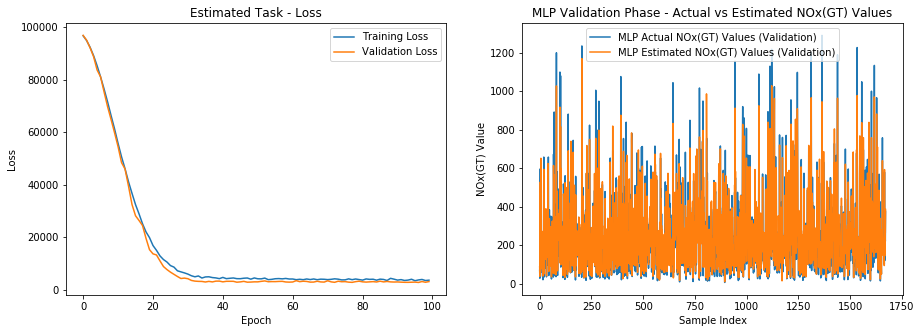

In [54]:
# Plot training history for regression model
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(regression_model_fitted.history['loss'], label='Training Loss')
plt.plot(regression_model_fitted.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Estimated Task - Loss')

# Plotting the predicted vs actual values
plt.subplot(1, 2, 2)
plt.plot(Y_test_regression.values, label='MLP Actual NOx(GT) Values (Validation)')
plt.plot(y_pred_regression, label='MLP Estimated NOx(GT) Values (Validation)') 
plt.legend()
plt.xlabel('Sample Index')
plt.ylabel('NOx(GT) Value')
plt.title('MLP Validation Phase - Actual vs Estimated NOx(GT) Values')
plt.show()